# Time series forecasting coca and airlines data
- Forecast the CocaCola prices and Airlines Passengers data set. 
- Prepare a document for each model explaining 
      - how many dummy variables you have created 
      - RMSE value for each model
- Finally which model you will use for Forecasting

Time series concept
Data collected over regular time intervals in a chronological order maybe univariate or multivariate (multiple variables v/s time)

Forecasting components: Level, Trend:overall upward or downward pattern, seasonality and noise:erratic,unsystematic,residual fluctuations (non-systemic)

Visualization
Using lineplots, lagplots, ACF (auto-correlation function)
Visualization can be misleading due to missing data, scale of plot, aspect ratio (h:w ratio)
It makes huge dataset coherent, help us identify patterns and anomalies in data.

Transformation
Upsampling: increasing time interval frequency eg from min to second
Downsampling: decreasing time interval frequency eg: from months to qaurter
Data transforms are intended to remove noise from dataset. eg: square root and log transforms
Non-stationary data is one where mean and variance changes with time. Makes it difficult to model
Moving average

Exponential Smoothening
Moving averages are used to remove trend and seasonal components and observe underlying casual processes in the time series.
Moving averages are calculated as centered and trailing, latter can be used for forcasting. Time series is stationary (no trends and seasonality). 
Weighted moving averages within sliding window values are given weights so that more recent points matter more.

Model building using ARIMA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datetime import datetime
from matplotlib import dates

In [3]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx',index_col=0)
df.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [10]:
df.tail()

,Sales
Quarter,
Q2_95,4936.0
Q3_95,4895.0
Q4_95,4333.0
Q1_96,4194.0
Q2_96,5253.0


In [15]:
df.shape

(42, 1)

### Visualisation

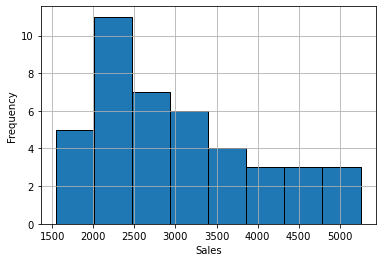

In [35]:
df['Sales'].plot.hist(bins=8,edgecolor='k',grid=True).autoscale(enable=True,axis='both')
plt.xlabel('Sales');

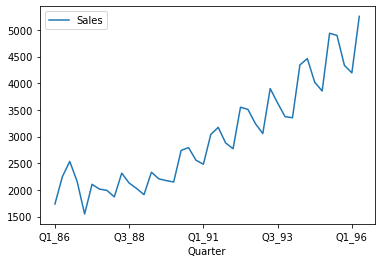

In [19]:
df.plot.line();

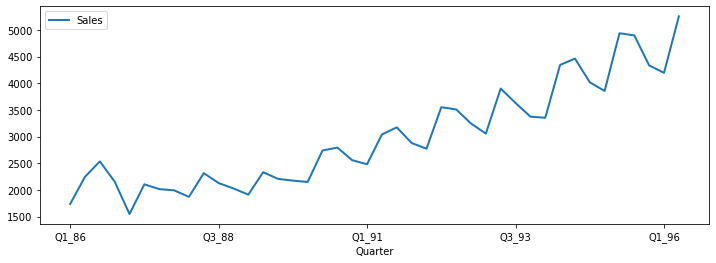

In [24]:
# changing aspect ratio
df.plot.line(figsize=(12,4),lw=2);

In [ ]:
# for multivariate time series try scatter plot, area plot, multi bar plot, hexagonal bin plot
# Datetime index

In [43]:
# Time resampling: Quarterly ---> monthly df.resample(rule='A').agg()
# Time shifting df.shift(n_rows_toshift,fill_value=0) OR df.shift(period=1,freq='M')
# Rolling: select a window i.e number of rows, apply agg() and keep rolling df.rolling(window=7).mean()
# large window size gives us general trend, as window size decreases it starts to fit the original data
# Expanding: instead of specifying a window size and rolling it, we use all prior data-mean() gradually increases

## Time series analysis with statsmodel library
Statsmodel is one of the important libraries for statistical model building, test and exploration of time series data

In [ ]:
# Hodrick Prescott filter (statsmodel built in test function)
# Time series components: Trend (upward,stationary,downward), seasonality: Repeating trend, cyclical: trends with no set repitition, noise, level
# HP filter separates trend and cyclical component using quadratic loss function with lamda parameter that handles the variations
# in growth rate of trend component. Recommended values: 6.25 for annual data, 1600:quaterly,129600:monthly
# statsmodels.tsa (time series analysis)

In [22]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [23]:
Sales_cycle,Sales_trend = hpfilter(df['Sales'],lamb=1600)

In [24]:
df['trend'] = Sales_trend
df['cyclical'] = Sales_cycle

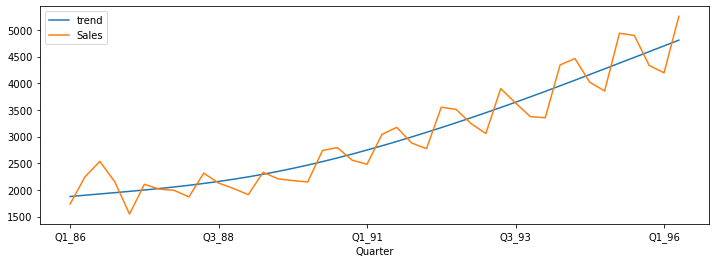

In [25]:
df[['trend','Sales']].plot(figsize=(12,4));
# df[['trend','Sales']]['Q3_93':].plot(figsize=(12,4)); # zoom in

In [6]:
idx = pd.date_range('01/01/1986', periods=42, freq='Q')
df = df.set_index(idx)
df.head()

,Sales
1986-03-31,1734.827000
1986-06-30,2244.960999
1986-09-30,2533.804993
1986-12-31,2154.962997
1987-03-31,1547.818996


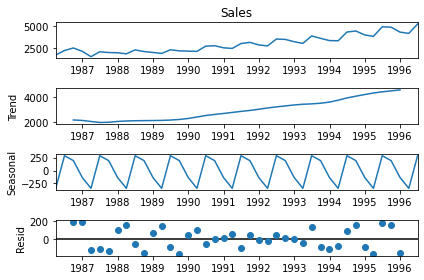

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df['Sales'],model='additive').plot();

# we see additive seasonality and a stationary trend for initial years followed by linear trend in recent years

In [43]:
from pmdarima import auto_arima
model = auto_arima(df['Sales'],start_p=0,start_q=0,seasonal=True,trace=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=588.375, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=617.615, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=588.401, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=617.215, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=586.466, Time=0.17 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=588.405, Time=0.66 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=587.276, Time=0.38 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(1,0,0)[12]             : AIC=584.649, Time=0.10 sec
 ARIMA(0,1,0)(2,0,0)[12]             : AIC=586.594, Time=0.22 sec
 ARIMA(0,1,0)(1,0,1)[12]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,1)[12]             : AIC=inf, Time=

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   42
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -290.325
Date:                            Thu, 18 Feb 2021   AIC                            584.649
Time:                                    21:09:59   BIC                            588.076
Sample:                                         0   HQIC                           585.897
                                             - 42                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.8589      0.071     12.095      0.000       0.720       0.998
sigma2        5.5e+04   1.55e+04      3.556      0.000    2.47e+04    8.53e+04
===================================================================================
Ljung-Box (Q):                       77.79   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.00   Prob(JB):                         0.45
Heteroskedasticity (H):               1.69   Skew:                             0.26
Prob(H) (two-sided):                  0.34   Kurtosis:                         2.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
len(df)

42

In [14]:
train_df = df['Sales'][:38]
test_df = df['Sales'][38:]

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_df,order=(0,1,0),seasonal_order=(1,0,0,12))
results = model.fit()

C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [16]:
start = len(train_df)
end = len(train_df) + len(test_df) - 1
predictions = results.predict(start,end,typ='levels').rename('SARIMA')

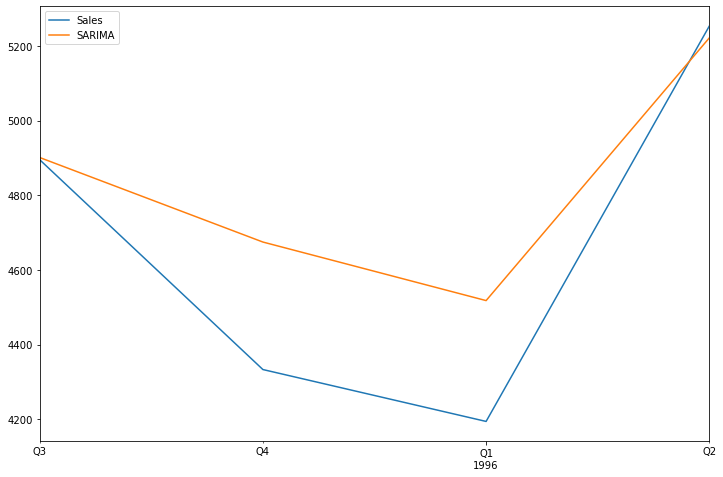

In [17]:
test_df.plot(figsize=(12,8),legend=True)
predictions.plot(legend=True);

In [18]:
from statsmodels.tools.eval_measures import rmse
rmse(test_df,predictions)

235.83561517459492

In [19]:
df['Sales'].mean()

2994.353307723999

In [28]:
# Forecast
final_model = SARIMAX(df['Sales'],order=(0,1,0), seasonal_order=(1,0,0,12)).fit()
forecast = final_model.predict(len(df),len(df)+3,typ='levels').rename('SARIMA forecast')

C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


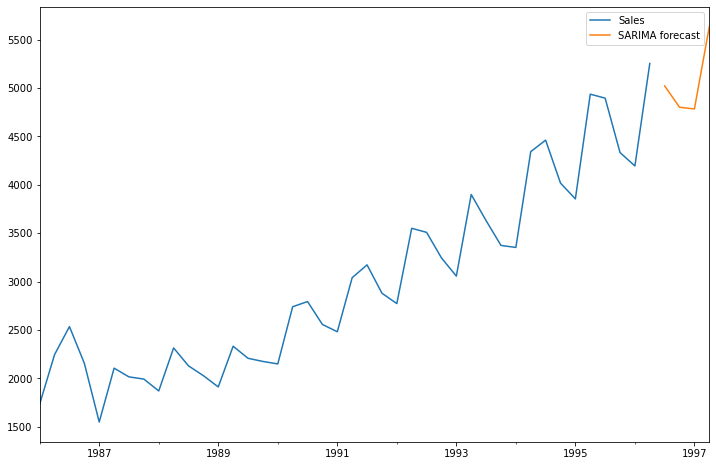

In [29]:
df['Sales'].plot(figsize=(12,8),legend=True)
forecast.plot(legend=True);

### Visualisation

In [30]:
df1 = pd.read_excel('Airlines+Data.xlsx',index_col=0,parse_dates=True)
df1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [31]:
type(df1.index) # if not use airline.index = pd.to_datetime(airline.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [32]:
df1.shape

(96, 1)

In [33]:
df1.isnull().sum()

Passengers    0
dtype: int64

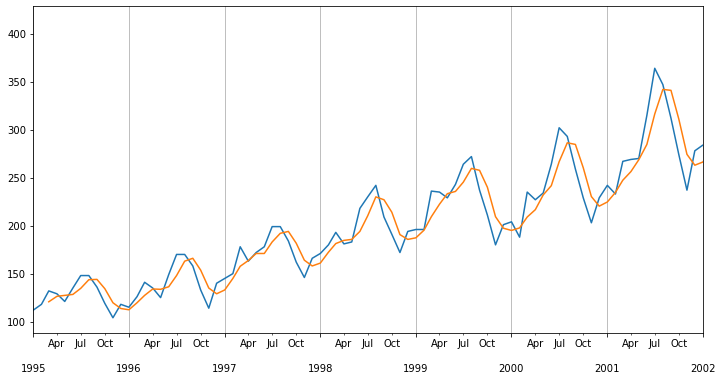

In [69]:
df1['Passengers: 3 months mean'] = df1.rolling(window=3).mean()['Passengers']
fig, ax = plt.subplots(figsize=(12,6))
#df1[['Passengers','Passengers: 3 months mean']].plot(figsize=(12,4),ax=ax).autoscale(axis='x',tight=True)

ax.plot(df1[['Passengers','Passengers: 3 months mean']])
ax.autoscale(axis='x',tight=True)
ax.set(xlabel='')
#plt.xticks(rotation=90);

datemin = np.datetime64(df1.index[0], 'Y')
datemax = np.datetime64(df1.index[-1], 'Y') #+ np.timedelta64(1, 'M')
ax.set_xlim(datemin, datemax)

ax.xaxis.set_minor_locator(dates.MonthLocator(interval=3))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y'))

ax.xaxis.grid(True);

In [ ]:
# We observe a general trend upwards either linear or exponential (difficult to tell due to seasonality)
# there's seasonality on annual basis: passengers peaks during vacation months as expected
# Hence we separate out the components of raw data using ETS model

In [57]:
# ETS models (Error Trend Seasonality) like Exponential smoothening, ETS decomposition, Trend methods
# Statsmodel provides decomposition tools we can use to separate different components

# 2 types of ETS decomposition models: Use Additive when trend is linear and seasonality seems constant over time 
# multiplicative when non-linear trend rate 

from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df1['Passengers'],model='multiplicative')

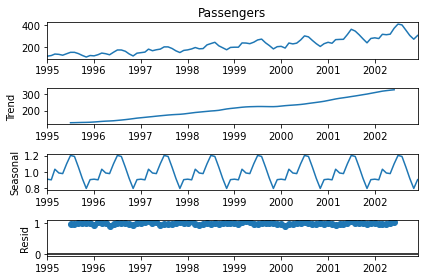

In [60]:
#from pylab import rcParams
#rcParams['figure.figsize'] = 12,5
results.plot();

# We observe a linear trend in initial years and exponential trend for recent years, additive seasonality and some noise
# Also an additive annual seasonality

In [ ]:
# simple moving averages can help us analyse a general behaviour of time series
# In SMA the entire model will be constrained to same window - smaller windows lead to more noise than signal, always lag by
# size of window, it will never reach full peak/crest of data due to averaging, doesnt help in forecasting only helps describe 
# general trends, extreme values may significantly skew SMA - fix it by EWMA 
# It will be better if more recent data is weighted than older data - EWMA allows us to implement it - reduces lag effect of SMA
#

In [62]:
df1['6 months SMA'] = df1['Passengers'].rolling(window=6).mean()
df1['12 months SMA'] = df1['Passengers'].rolling(window=12).mean()

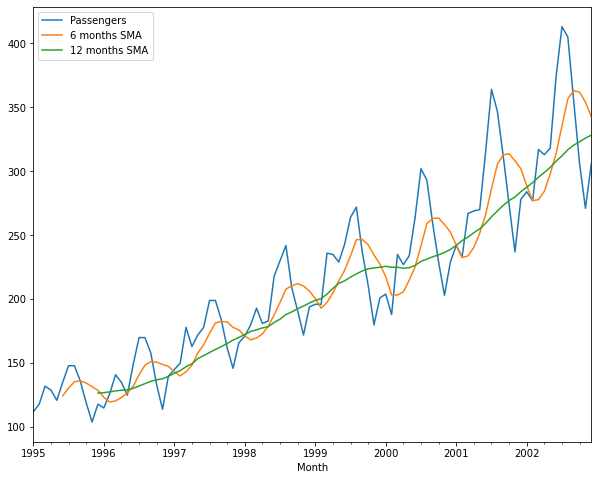

In [64]:
df1.plot(figsize=(10,8));

In [65]:
df1['EWMA-12'] = df1['Passengers'].ewm(span=12).mean()

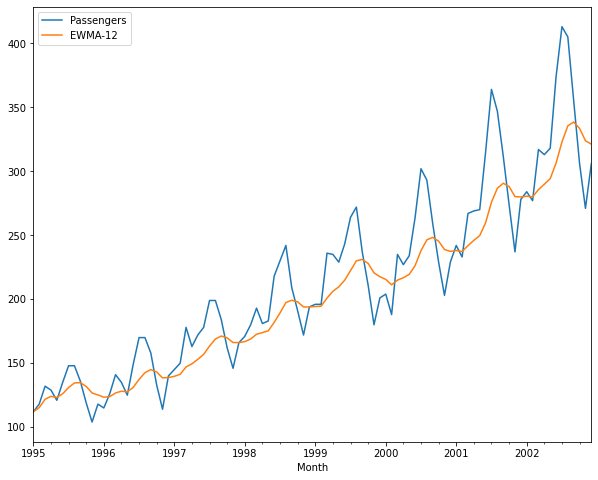

In [66]:
df1[['Passengers','EWMA-12']].plot(figsize=(10,8));

# here seasonality is lot more clear towards end compared to the beginning (due to heavier weights for recent data)
# there's no lag as in SMA

In [ ]:
# when adjust parameter of ewm is false SMA is calculated
# weights are assigned in factor of 1 for xt, (1-alpha) for xt-1, (1-alpha)^2 for xt-2 and so on. 
# Hence weights are reduced over time most recent data xt is given highest weight
# yt = alpha * xt + (1-alpha) yt-1
# alpha can be specified in terms of span, center of mass, half-life
# span can be thought as N-day exponentially moving average - 7 day EMA etc
# center of gravity c= (s-1)/2
# half life is period of time required for exponential weights to reduce to half of its original value
# directly specify smoothing factor alpha

In [ ]:
# EWMA or SMA fails to capture seasonality and trend compenents (only has alpha parameter)
# We use holts-winter model for the same also called triple exponential smoothening (holts captures trend not seasonality 
# called double exponential smoothening)
# Holts-winter seasonal model have one eqn for forecasting and 3 eqn for smoothening capturing level,trend,seasonality
# with corresponding parameters alpha, beta, gamma
# two variants: Additive- when seasonality is constant, Multiplicative- when seasonality varies proportional to level of series
# L is number of divisions per cycle, so if we use monthly data that show repeating patterns per year, we would use L = 12
#

In [78]:
df1.index.freq='MS' # setting frequency to start of month

In [74]:
span = 12
alpha = 2/(span+1) # for span>1

In [80]:
df1['EWMA12'] = df1['Passengers'].ewm(alpha=alpha,adjust=False).mean() 

In [81]:
# Simple exponential smoothening
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(df1['Passengers'])
fitted_model = model.fit(smoothing_level=alpha,optimized=False)
df1['SES12']=fitted_model.fittedvalues.shift(-1)
# df1['SES12']= SimpleExpSmoothing(df1['Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)

In [87]:
df1
# EWMA and Simple exponential smoothening are same

,Passengers,EWMA12,SES12
Month,,,
1995-01-01,112,112.000000,112.000000
1995-02-01,118,112.923077,112.923077
1995-03-01,132,115.857988,115.857988
1995-04-01,129,117.879836,117.879836
1995-05-01,121,118.359861,118.359861
...,...,...,...
2002-08-01,405,335.501047,335.501047
2002-09-01,355,338.500886,338.500886
2002-10-01,306,333.500749,333.500749


In [89]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df1['DES_add_12'] = ExponentialSmoothing(df1['Passengers'],trend='add').fit().fittedvalues.shift(-1)

C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [90]:
df1.head()

,Passengers,EWMA12,SES12,DES_add_12
Month,,,,
1995-01-01,112,112.000000,112.000000,114.042073
1995-02-01,118,112.923077,112.923077,120.042073
1995-03-01,132,115.857988,115.857988,134.042073
1995-04-01,129,117.879836,117.879836,131.042073
1995-05-01,121,118.359861,118.359861,123.042073


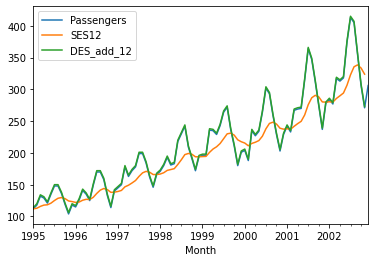

In [91]:
df1[df1.drop(columns='EWMA12').columns].plot();

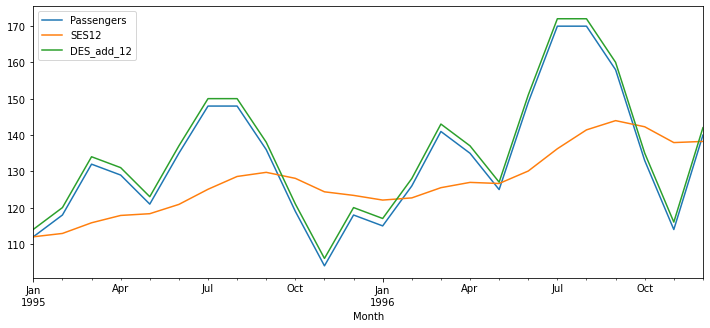

In [93]:
# The Double exponential smoothening fits so well that it appears to be overlapping. Let's zoom in 
df1[df1.drop(columns='EWMA12').columns].iloc[:24].plot(figsize=(12,5)); # initial two years

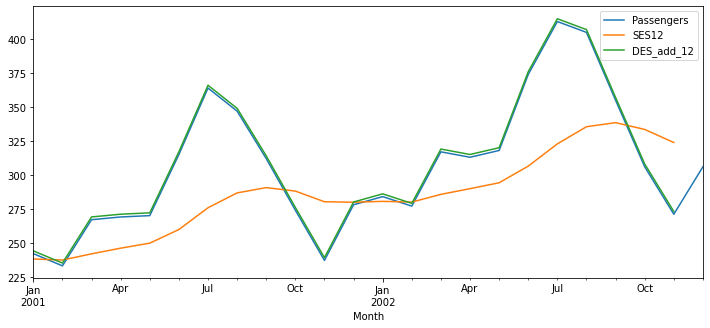

In [94]:
df1[df1.drop(columns='EWMA12').columns].iloc[-24:].plot(figsize=(12,5)); # recent two years
# We see Double exponential smoothening is able to estimate much better than simple exponential smoothening
# Also it fits recent data even better

C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


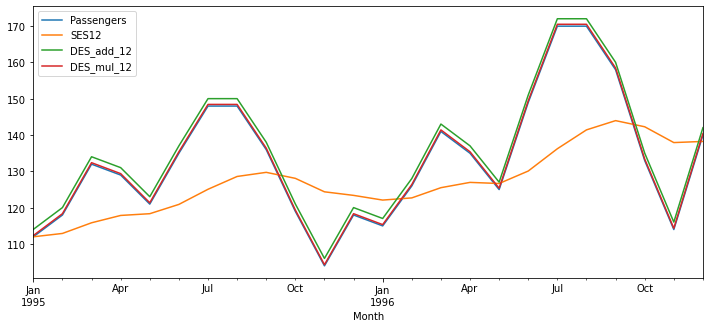

In [95]:
# Checking multiplicative model
df1['DES_mul_12'] = ExponentialSmoothing(df1['Passengers'],trend='mul').fit().fittedvalues.shift(-1)
df1[df1.drop(columns='EWMA12').columns].iloc[:24].plot(figsize=(12,5));

In [ ]:
# We see multiplicative double exponential model is performing better. It is exactly overlapping with the original 
# passenger line.

In [100]:
# Let's explore triple exponential smoothening which also considers seasonalality term as well
df1['TES_mul_12'] = ExponentialSmoothing(df1['Passengers'], trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [101]:
df1.head()

,Passengers,EWMA12,SES12,DES_add_12,DES_mul_12,TES_mul_12
Month,,,,,,
1995-01-01,112,112.000000,112.000000,114.042073,112.343374,111.142866
1995-02-01,118,112.923077,112.923077,120.042073,118.361769,113.937970
1995-03-01,132,115.857988,115.857988,134.042073,132.404691,140.260847
1995-04-01,129,117.879836,117.879836,131.042073,129.395493,133.676184
1995-05-01,121,118.359861,118.359861,123.042073,121.370967,131.405107


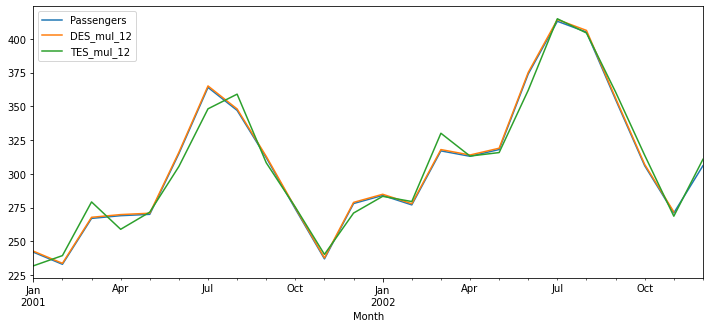

In [107]:
df1[df1.drop(columns=['EWMA12','SES12','DES_add_12']).columns].iloc[-24:].plot(figsize=(12,5));
# DES performs better

### Model building
Choose a model --> split data into training and test --> fit the model on training data --> evaluate the model on test data --> re-fit on entire dataset --> forecast for future 

AR - Auto Regression
I - Integrated
MA - Moving Averages
S - Seasonal
X - Exogenous 
ARIMA, SARIMA, SARIMAX, VAR, VARMA

In [ ]:
# train-test split- Test set is most recent end of data. How large? Mostly the size is 20% of total depends on how far you
# want to forecast. At least as large as maximum forecast horizon required.If you intend to predict one year into future then test 
# set should be at least one year. Longer forecast horizon, more likely your prediction less accurate (more noise added etc)

In [110]:
df1.shape 

(96, 6)

In [131]:
# intend to so 12 month forecast hence 12 month size of test data
train_df = df1.iloc[:85]
test_df = df1.iloc[84:]

In [123]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(train_df['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()  #TES_mul_12

C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [132]:
test_predictions = model.forecast(12)

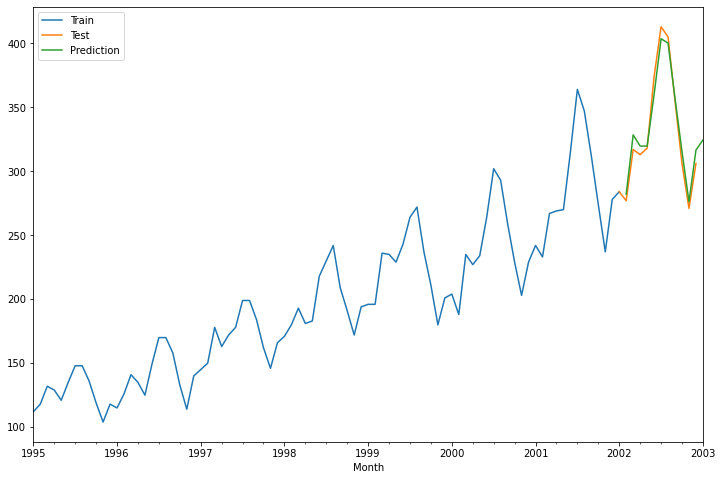

In [133]:
# Let's evaluate our model by comparing test_predictions with actual test data
train_df['Passengers'].plot(figsize=(12,8),legend=True,label='Train')
test_df['Passengers'].plot(figsize=(12,8),legend=True,label='Test')
test_predictions.plot(figsize=(12,8),legend=True,label='Prediction');

# We see good performance

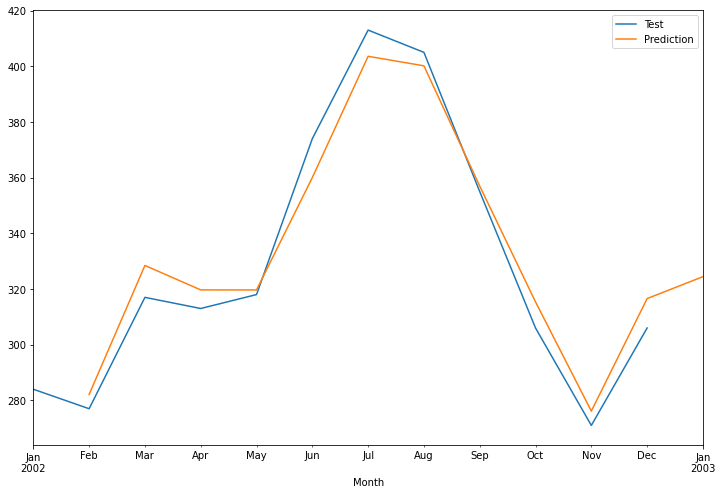

In [134]:
test_df['Passengers'].plot(figsize=(12,8),legend=True,label='Test')
test_predictions.plot(figsize=(12,8),legend=True,label='Prediction');
# our model is sometimes underpredicting and overpredicting 
# Let's quantify the error and evaluate our prediction

In [ ]:
# Evaluation metrics designed for continuous values along time series
# MAE(doesnt alert when forcast is off for just a few points)-->MSE(It is of order 2, difficult to compare it as units are sqaured)-->RMSE
# Compare RMSE with average of data, to understand RMSE
# Not possible to evaluate forcast for future dates, we really dont know- true values are not available

In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(test_df['Passengers'],test_predictions)

from statsmodels.tools.eval_measures import mse,meanabs,rmse

27.38497875394736

In [141]:
test_df['Passengers'].mean()
# our predictions can be off by about +/- 27.38 for forcast values around 328.25

328.25

In [142]:
np.sqrt(mean_squared_error(test_df['Passengers'],test_predictions))

32.52286554005896

In [143]:
# Finally training on entire dataset
final_model = ExponentialSmoothing(df1['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit() 

C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [145]:
# forecasting on future 12 month period
forecast = final_model.forecast(12)

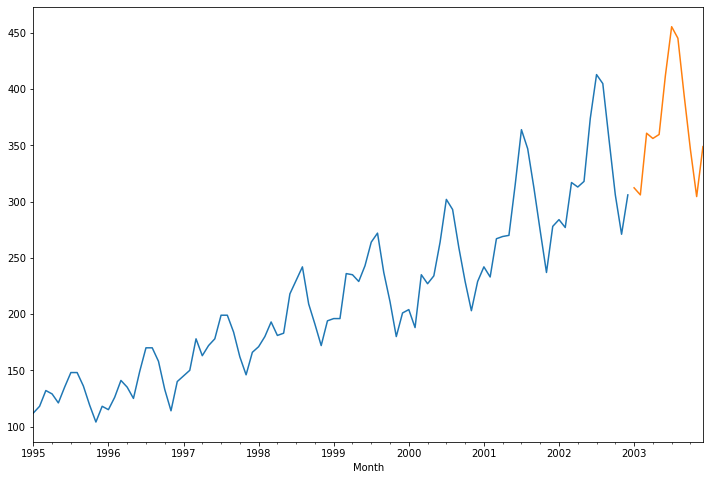

In [146]:
df1['Passengers'].plot(figsize=(12,8))
forecast.plot();

In [ ]:
# non stationary: showcases either trend or seasonality or both
# stationary data: no trend and no seasonality
# we can convert non stationary into stationary data using diff

In [148]:
from statsmodels.tsa.statespace.tools import diff

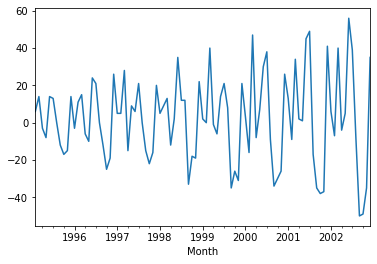

In [149]:
# first order difference
#df1['Passengers'] - df1['Passengers'].shift(1)
diff(df1['Passengers'],k_diff=1).plot() # k_diff is order

In [ ]:
# ACF and PACF- Autocorrelation and Partial Autocorrelation
# Correlation is measure of linear relationship between two variable, 1 positive linear, -1 negative linear, 0 no linear relation
# Autocorrelation plots (correlogram) shows correlation of series with itself lagged by x time units
# y axis- correlation, x axis - number of time units or lag
# Calculate the residual of scatter plot for day i and day i-1, plot residuals against day i-2, again continue--PACF
# They help choose parameters for ARIMA based models, for practical purposes we use grid search

In [151]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf,pacf_yw,pacf_ols

In [152]:
acf(df1['Passengers']) # correlation with lagged time series

C:\Users\priya\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.92817479,  0.8377003 ,  0.75912683,  0.69001805,
        0.64007997,  0.5983407 ,  0.56046942,  0.54403515,  0.5554825 ,
        0.57512705,  0.61319803,  0.62794784,  0.56221853,  0.48481096,
        0.41842954,  0.35727781,  0.31071555,  0.26844553,  0.23812834,
        0.22509805,  0.23687594,  0.25427876,  0.28281484,  0.29370769,
        0.24539841,  0.18613412,  0.14165985,  0.09862367,  0.06400382,
        0.03079153,  0.00923044,  0.00151405,  0.01519006,  0.03257838,
        0.05911755,  0.0711796 ,  0.03572558, -0.00750988, -0.04132627,
       -0.07356355])

In [154]:
pacf_yw(df1['Passengers'],nlags=len(df1)-1,method='mle') # max likelihood estimation mle, alt use unbiased yw=yeol walker

array([ 1.00000000e+00,  9.28174787e-01, -1.71910366e-01,  5.57411891e-02,
        5.66891947e-04,  9.44946875e-02,  1.10530126e-03,  1.37045856e-02,
        1.44558600e-01,  1.80859284e-01,  6.12203863e-02,  2.06462910e-01,
       -1.19719036e-01, -5.03327249e-01, -3.59780859e-03,  4.22315966e-02,
       -2.78160899e-02,  4.25051737e-02,  3.56649543e-02,  1.01557807e-01,
       -8.05968552e-02,  2.92619327e-02, -2.39909983e-02, -2.77357660e-02,
        2.42775672e-02, -1.25261314e-01, -2.44803783e-02,  1.02342173e-01,
       -4.25036364e-02,  1.47320970e-02, -3.31689035e-02,  3.21442499e-02,
       -5.83364758e-02, -7.72079761e-03,  8.54665714e-03,  2.09233918e-02,
       -1.72968769e-02, -4.13412774e-02, -2.43321288e-02, -1.79039636e-02,
       -1.39386616e-02, -7.24001252e-02,  8.87574368e-02, -7.36440465e-02,
       -2.59966009e-02, -5.99650048e-02, -1.32131714e-02, -3.51341195e-02,
        1.58133242e-02, -3.84961778e-02, -4.87742094e-02,  7.58457304e-02,
        6.12248822e-02, -

In [155]:
pacf_ols(df1['Passengers'],nlags=len(df1)-1) # ordinary least squares

array([ 1.00000000e+00,  9.44928630e-01, -2.82108240e-01,  2.19225531e-01,
        8.40638582e-02,  3.32591140e-01, -3.20467615e-02,  6.90906056e-02,
        2.36656200e-01,  5.22659593e-01,  2.84628077e-01,  7.71066086e-01,
        5.77526402e-01, -6.65123854e-01, -3.32752421e-01,  1.52636323e-01,
       -2.16320291e-01,  3.85955585e-03,  4.72406467e-02,  2.31784236e-01,
       -1.10201031e-01,  3.19041129e-01,  2.89427774e-01,  2.85464538e-01,
        4.74957009e-02, -1.97809737e-01, -2.60338670e-01,  1.23075580e-01,
       -2.62527004e-02,  2.55246445e-02,  1.88126110e-03,  2.84549761e-01,
        1.30164106e-01,  5.68983368e-02,  2.01666894e-01,  1.06218200e-01,
        3.15201496e-01, -1.97189293e-02, -2.34674707e-01,  1.24071361e-01,
        2.94600898e-01,  3.25701571e-02,  3.01693027e-01,  4.64855136e-01,
        7.96705979e-02,  5.23446839e-01, -1.52067811e-01,  1.24332392e+00,
        2.22521974e-01,  8.06662971e-01, -2.31895592e-01, -2.88382073e-01,
        3.78366237e-01, -

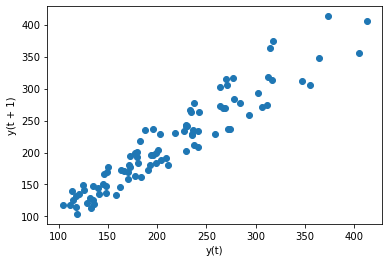

In [157]:
# Plotting ACF and PACF
from pandas.plotting import lag_plot
lag_plot(df1['Passengers']); # plot is indicative of strong autocorrelation

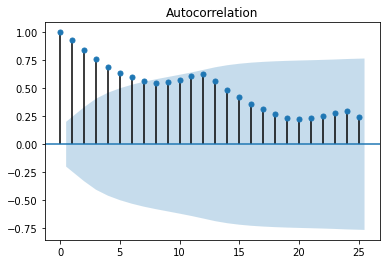

In [160]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df1['Passengers'],lags=25); # shaded region represents 95% CI, correlation outside shaded region are likely to be
# correlation indeed, gradual decrease - non stationary, sharp decline for stationary data
# Use this plots to indentify AR,MA terms of ARIMA model
# Gradual decay in ACF, with many significant spikes use MA term of order 0/1

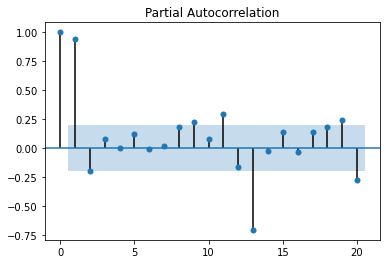

In [161]:
plot_pacf(df1['Passengers']);
# AR model with 1 lag as we see steep cutoff at 1 on PACF plot

### ARIMA - components are AR, I and MA 
not suitable for all timestamp data especially where outside factors that influences the output.
When these factors are incorporated in timestamp data already it may perform well.
To handle seasonal data we have SARIMA and to consider exogenous variables we have SARIMAX

ARIMA model uses Integrated component I to eliminate non stationarity and make it stationary- diff is applied one or more times comes at cost of losing d number of rows
ARIMA(p,d,q) where p,d,q are non negative integers. They are parameters corresponding to AR,I,MA components.
AR (p)-utilises the relation between current observation and observations over previous period
I (d)- reports differencing of observations against observations over previous period. Number of times to diff to make it stationary
MA (q) - uses dependency between observation and residual error from MA model applied to lagged observations.

Stationary series constant mean and variance over time. No trend and No seasonality. 
Mathematical tests to check stationary dataset - Augmented Dicky Fuller test

For non stationary data use Integrated component to convert to stationary. p,d,q values can be chosen using ACF, PACF plots (not much reliable and subject to individual observation). Another way is to perform grid search (computationally intensive but accurate).

SARIMA model considers seasonal component as well, adds 3 new parameters P,D and Q for seasonal component.

AR:future values are predicted using linear relation with lagged values upto order p. with higher order model becomes complex and start picking noise.
phi are lag coefficients up to order p, constant c and white noise (epsilon).
Statsmodel chooses best lag order on certain criteria indicated by ic parameter which takes values like aic (Akaiki information criteria), bic (Bayes information criteria), t-stat etc. depends on your error metrics.
aic - evaluates collection of models and estimate quality of models relative to one another, penalises increasing complexity of models with little performance improvement.
#from statsmodels.tsa.ar_model import AR,ARResults

We have many different models to choose from. In order to select best model, we need to understand our data. We perform different tests for the same. 
If it's stationary, independent or if two series demonstrate causality
Stationary: **Augmented Dicky Fuller Test** (hypothesis test returns p value- Null hypothesis: unit test p-value<0.05 we reject null hypothesis- stationary)
**Granger causality** test is useful to determine whether one time series is useful in forecasting another. Measures 'changes' in one series is correlated with changes in another after a consistent amount of time. if positive there can be some outside third factor possibly influencing both. 

In [163]:
#Augmented Dicky Fuller test
from statsmodels.tsa.stattools import adfuller
adfuller(df1['Passengers'])

(1.3402479596467018,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [164]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression.
    
        * 'c' : constant only (default).
        * 'ct' : constant and trend.
        * 'ctt' : constant, and linear and quadratic trend.
        * 'nc' : no constant, no trend.
    
    autolag : {'AIC', 'BIC', 't-stat', None}
        Method to use when automatically determining the lag.
    
        * if None, then maxlag lags are used.
        * if 'AIC' (default) or 

In [ ]:
def adf_test(series):
    from statsmodels.tsa.stattools import adfuller
    test = pd.DataFrame(data=adfuller(series)[0:4],index=['adf_teststatistics','p-value','usedlag','nobs'],columns=['values'])
    for i,value in enumerate(adfuller(series)[4]):
        test.loc[f'critical value-{value}'] = [adfuller(series)[4][value]]
    if test.loc['p-value','values']<=0.05:
        print('Strong evidence against null hypothesis \nReject null hypothesis \nData has no unit root and is stationary')
    else:
        print('Weak evidence against null hypothesis \nAccept null hypothesis \nData has unit root and is non-stationary')
    return test

In [195]:
adf_test(df1['Passengers'])

Weak evidence against null hypothesis 
Accept null hypothesis 
Data has unit root and is non-stationary


,values
adf_teststatistics,1.340248
p-value,0.996825
usedlag,12.000000
nobs,83.000000
critical value-1%,-3.511712
critical value-5%,-2.897048
critical value-10%,-2.585713


In [194]:
# Granger causality
#from statsmodels.tsa.stattools import grangercausalitytests # set max_lag parameter # check for low p-value

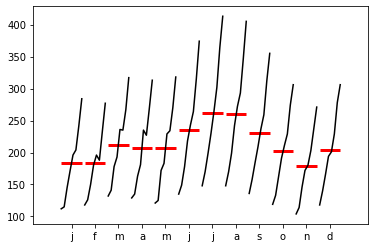

In [197]:
from statsmodels.graphics.tsaplots import quarter_plot,month_plot
month_plot(df1['Passengers']);
# We see number of people travelling peaks in july,june,august and dec due to holidays

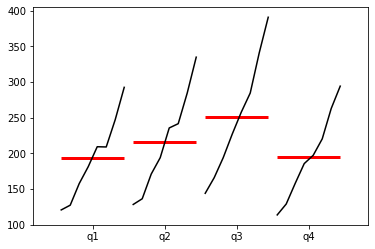

In [198]:
dfq = df1['Passengers'].resample(rule='Q').mean()
quarter_plot(dfq);
# summer months quater experiences heavy air traffic due to holidays

In [ ]:
# ARIMA (p,d,q) model
# Classical method of reading ACF and PACF
# depending on data we may need one or more components
# if autocorrelation plot shows positive autocorrelation at first lag then it suggests to use AR terms in relation to the lag
# if autocorrelation plot shows negative autocorrelation at first lag then it suggests to use MA terms
# In ACF model a sharp drop after k lags suggests k order AR should be used
# gradual decline suggests MA model
# AR model identification - PACF and MA model identification- ACF

In [ ]:
# use pmdarima library (pyramid arima) for grid search across multiple combinations of p,d,q and P,D,Q
# pmdarima uses aic as evaluation metrics which penalises complex models


In [209]:
# !pip install pmdarima

In [200]:
from pmdarima import auto_arima

In [201]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [205]:
# train test split not required, later needed to evaluate the model
model = auto_arima(df1['Passengers'],start_p=0,start_q=0,max_p=6,max_q=3,seasonal=True,trace=True,m=12) # when aic converges model stops not neccesarily evaluating all p,q,d
# m is number of periods in each season, seasonal is true for data with seasonality

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=620.094, Time=0.13 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=622.012, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=615.965, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=616.628, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=618.192, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=617.814, Time=0.20 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=617.881, Time=0.14 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=616.531, Time=0.10 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.34 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=618.221, Time=0.04 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=617.862, Time=0.08 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=617.462, Time=0.10 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=616.076, Time=0.07 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=619.394, Time=0.22 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

In [206]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -304.983
Date:                            Wed, 17 Feb 2021   AIC                            615.965
Time:                                    23:26:25   BIC                            623.222
Sample:                                         0   HQIC                           618.881
                                             - 96                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2250      0.099     -2.276      0.023      -0.419      -0.031
ar.S.L12      -0.2274      0.089     -2.548      0.011      -0.402      -0.052
sigma2        90.2700     14.667      6.155      0.000      61.524     119.016
===================================================================================
Ljung-Box (Q):                       37.73   Jarque-Bera (JB):                 2.23
Prob(Q):                              0.57   Prob(JB):                         0.33
Heteroskedasticity (H):               1.77   Skew:                             0.39
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [207]:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARIMAResults,ARMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

In [217]:
train_df = df1['Passengers'].iloc[:85]
test_df = df1['Passengers'].iloc[85:]

In [210]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [218]:
model = SARIMAX(train_df,order=(1,1,0), seasonal_order=(1,1,0,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   85
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -265.745
Date:                            Thu, 18 Feb 2021   AIC                            537.489
Time:                                    01:16:31   BIC                            544.319
Sample:                                01-01-1995   HQIC                           540.208
                                     - 01-01-2002                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2389      0.106     -2.245      0.025      -0.447      -0.030
ar.S.L12      -0.2609      0.095     -2.738      0.006      -0.448      -0.074
sigma2        92.8848     16.251      5.716      0.000      61.033     124.737
===================================================================================
Ljung-Box (Q):                       33.56   Jarque-Bera (JB):                 2.36
Prob(Q):                              0.75   Prob(JB):                         0.31
Heteroskedasticity (H):               2.61   Skew:                             0.42
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [219]:
start = len(train_df)
end = len(train_df) + len(test_df) -1
predictions = results.predict(start,end,typ='levels').rename('SARIMA')

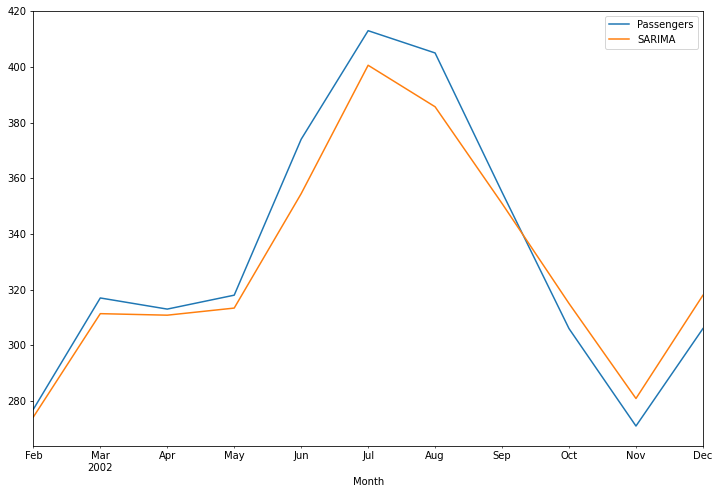

In [220]:
test_df.plot(figsize=(12,8),legend=True)
predictions.plot(legend=True);

# Our predictions appear to be good. Let's quantify the errors and evaluate the performance

In [221]:
from statsmodels.tools.eval_measures import rmse
rmse(test_df,predictions)

10.931946846177134

In [223]:
test_df.mean()

# good enough performance

332.27272727272725

In [ ]:
# Forecast
final_model = SARIMAX(df1['Passengers'],order=(1,1,0), seasonal_order=(1,1,0,12)).fit()
forecast = final_model.predict(len(df1),len(df1)+11,typ='levels').rename('SARIMA forecast')

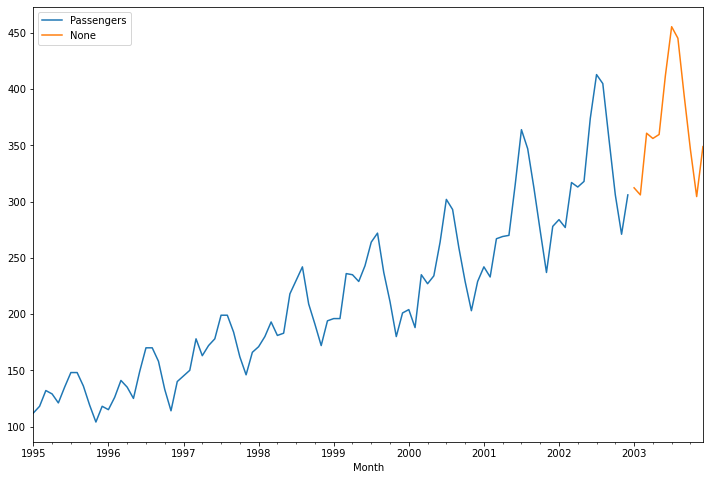

In [226]:
df1['Passengers'].plot(figsize=(12,8),legend=True)
forecast.plot(legend=True);

In [ ]:
# We only used previous historical label data. If we have other variables they may be exogenous
# Exogenous variables are outside information not label data
# it is related to label however it is not actual label itself
# Supplemental information related to label but not label in itself, somehow related to label

# Thank you!